#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Ciencia y Analitica de Datos**
###Tecnológico de Monterrey
###Prof Maria de la Paz Rico Fernandez

## **Reto: Segundo entregable**
###**Aguas superficiales**

## **Nombres y matrículas de los integrantes del equipo:**

### **Jose Santiago Rueda Antonio**

Matricula: A01794118

### **Roberto Santiago Oliva**

Matricula: A01374957

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.tree import export_graphviz

In [ ]:
df_superf = pd.read_csv('https://drive.google.com/uc?id=1-kiPH9HsEGax_mt-u7lXLghMhEGlQNH4', sep=',',encoding = "ISO-8859-1")
df_superf.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,...,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO


## Limpieza

In [ ]:
names = df_superf.columns.to_list()

In [ ]:
df_superf.shape

(4141, 55)

In [ ]:
types=df_superf.dtypes

In [ ]:
len(names)

55

In [ ]:
types = df_superf.dtypes.to_dict()

In [ ]:
df_superf

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,...,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
columns = ['DBO_mg/L', 'DQO_mg/L', 'SST_mg/L', 'COLI_FEC_NMP_100mL', 'E_COLI_NMP_100mL', 'ENTEROC_NMP_100mL', 'OD_PORC', 'OD_PORC_SUP', 'OD_PORC_MED', 'OD_PORC_FON', 'TOX_D_48_UT', 'TOX_V_15_UT', 'TOX_D_48_SUP_UT', 'TOX_FIS_SUP_15_UT',]

for i in columns:

  df_superf[i] = df_superf[i].astype('str')
  df_superf[i] = df_superf[i].str.replace('<25','25',regex=True) 
  df_superf[i] = df_superf[i].str.replace('<0.2','0.2',regex=True)
  df_superf[i] = df_superf[i].str.replace('<1','1',regex=True) 
  df_superf[i] = df_superf[i].str.replace('<2','2',regex=True)
  df_superf[i] = df_superf[i].str.replace('<3','3',regex=True)  
  df_superf[i] = df_superf[i].str.replace('<20','20',regex=True) 
  df_superf[i] = df_superf[i].str.replace('<1.1','1.1',regex=True)
  df_superf[i] = df_superf[i].str.replace('<10','10',regex=True)
  df_superf[i] = df_superf[i].str.replace('<0.02','0.02',regex=True) 
  df_superf[i] = df_superf[i].str.replace('<0.01','0.01',regex=True) 
  df_superf[i] = df_superf[i].str.replace('<0.003','0.003',regex=True)
  df_superf[i] = df_superf[i].str.replace('<0.005','0.004',regex=True) 
  df_superf[i] = df_superf[i].str.replace('<0.0005','0.0004',regex=True) 
  df_superf[i] = df_superf[i].str.replace('<0.0015','0.0015',regex=True) 
  df_superf[i] = df_superf[i].str.replace('<0.025','0.025',regex=True) 
  df_superf[i]= df_superf[i].astype('float')
  mean_a = df_superf[i].mean()
  df_superf[i] = df_superf[i].replace(np.nan,mean_a)



In [ ]:
(df_superf.isnull().sum() * 100 / len(df_superf)).sort_values(ascending=False)


TOX_D_48_FON_UT           100.000000
CALIDAD_TOX_D_48_FON      100.000000
TOX_FIS_FON_15_UT         100.000000
CALIDAD_TOX_FIS_FON_15    100.000000
CALIDAD_OD_PORC_MED        88.239556
CALIDAD TOX_D_48_SUP       81.598648
CALIDAD_ENTEROC            78.169524
CALIDAD_OD_PORC_FON        77.155277
CALIDAD_OD_PORC_SUP        60.903163
CALIDAD_TOX_FIS_SUP_15     59.574982
CALIDAD_OD_PORC            56.604685
CALIDAD_TOX_D_48           56.145858
CALIDAD_TOX_V_15           56.073412
CONTAMINANTES              46.244868
CALIDAD_DQO                37.672060
CALIDAD_DBO                37.672060
CALIDAD_COLI_FEC           37.647911
CALIDAD_E_COLI             37.647911
SUBTIPO                    15.986477
CUERPO DE AGUA             15.986477
CALIDAD_SST                15.744989
CUENCA                     15.672543
CUMPLE_CON_SST             15.648394
CUMPLE_CON_CF              15.648394
SEMAFORO                   15.648394
CUMPLE_CON_E_COLI          15.648394
CUMPLE_CON_ENTEROC         15.648394
C

In [ ]:
columns_to_drop = ['CLAVE','TOX_D_48_FON_UT',
                   'CALIDAD_TOX_D_48_FON',
                    'TOX_FIS_FON_15_UT',
                     'CALIDAD_TOX_FIS_FON_15',
                      'CALIDAD_OD_PORC_MED',
                       'CALIDAD TOX_D_48_SUP',
                        'CALIDAD_ENTEROC',
                        'CALIDAD_OD_PORC_FON',
                        'CALIDAD_OD_PORC_SUP',
                        'CALIDAD_TOX_FIS_SUP_15',
                        'CALIDAD_OD_PORC',
                        'CALIDAD_TOX_D_48',
                        'CALIDAD_TOX_V_15']
df_superf.drop(columns_to_drop, inplace=True, axis=1)


In [ ]:
df_superf.shape

(4141, 41)

In [ ]:
names = df_superf.columns.to_list()
types = df_superf.dtypes.to_dict()
df_super_clean = pd.DataFrame(SimpleImputer(strategy='most_frequent').fit_transform(
    df_superf), columns=names).astype(types)

## Selección de X y Y

In [ ]:
X = df_super_clean.drop('SEMAFORO', axis=1)
y = LabelEncoder().fit_transform(df_super_clean['SEMAFORO'])
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)


In [ ]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LONGITUD,4141.0,-101.126668,5.898307,-117.12403,-105.259510,-100.958600,-97.680560,-8.673215e+01
LATITUD,4141.0,20.040593,4.271863,14.53491,16.839720,19.454840,21.998090,3.270650e+01
PERIODO,4141.0,2020.000000,0.000000,2020.00000,2020.000000,2020.000000,2020.000000,2.020000e+03
DBO_mg/L,4141.0,16.886481,51.423215,2.00000,2.000000,13.800000,16.886481,1.500000e+03
DQO_mg/L,4141.0,64.332985,118.277690,10.00000,20.700000,64.332985,64.332985,2.871250e+03
SST_mg/L,4141.0,102.148144,405.576843,10.00000,12.000000,32.000000,102.148144,9.430000e+03
COLI_FEC_NMP_100mL,4141.0,95688.808675,922925.127897,3.00000,1333.000000,24000.000000,95688.808675,2.419600e+07
E_COLI_NMP_100mL,4141.0,79337.687452,830107.982666,3.00000,150.000000,15531.000000,79337.687452,2.419600e+07
ENTEROC_NMP_100mL,4141.0,1086.709845,2010.985728,3.00000,1086.709845,1086.709845,1086.709845,2.419600e+04
OD_PORC,4141.0,66.840289,20.692827,10.00000,66.840289,66.840289,66.840289,2.261000e+02


In [ ]:
X.columns

Index(['SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO', 'CUENCA',
       'CUERPO DE AGUA', 'TIPO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO',
       'DBO_mg/L', 'CALIDAD_DBO', 'DQO_mg/L', 'CALIDAD_DQO', 'SST_mg/L',
       'CALIDAD_SST', 'COLI_FEC_NMP_100mL', 'CALIDAD_COLI_FEC',
       'E_COLI_NMP_100mL', 'CALIDAD_E_COLI', 'ENTEROC_NMP_100mL', 'OD_PORC',
       'OD_PORC_SUP', 'OD_PORC_MED', 'OD_PORC_FON', 'TOX_D_48_UT',
       'TOX_V_15_UT', 'TOX_D_48_SUP_UT', 'TOX_FIS_SUP_15_UT', 'CONTAMINANTES',
       'CUMPLE_CON_DBO', 'CUMPLE_CON_DQO', 'CUMPLE_CON_SST', 'CUMPLE_CON_CF',
       'CUMPLE_CON_E_COLI', 'CUMPLE_CON_ENTEROC', 'CUMPLE_CON_OD',
       'CUMPLE_CON_TOX', 'GRUPO'],
      dtype='object')

In [ ]:

pipe_geo = Pipeline(steps= [('geo', SimpleImputer(strategy='most_frequent'))])
geo = ['LONGITUD','LATITUD']


pipe_num = Pipeline(steps= [('num', MinMaxScaler())])
num = ['DBO_mg/L','DQO_mg/L','SST_mg/L','COLI_FEC_NMP_100mL','E_COLI_NMP_100mL',
       'ENTEROC_NMP_100mL','OD_PORC','OD_PORC_SUP','OD_PORC_MED','OD_PORC_FON','TOX_D_48_UT',
       'TOX_V_15_UT','TOX_D_48_SUP_UT','TOX_FIS_SUP_15_UT']

pipe_cat = Pipeline(steps= [('cat', OrdinalEncoder())])
cat_columns = ['TIPO','SUBTIPO', 'CALIDAD_DQO','CALIDAD_DQO','CALIDAD_SST','CALIDAD_COLI_FEC','CALIDAD_E_COLI','GRUPO','CONTAMINANTES']

pipe_bin = Pipeline(steps= [('bin', OrdinalEncoder())])
binarias = ['CUMPLE_CON_DBO','CUMPLE_CON_DQO','CUMPLE_CON_SST','CUMPLE_CON_CF','CUMPLE_CON_E_COLI','CUMPLE_CON_ENTEROC','CUMPLE_CON_OD','CUMPLE_CON_TOX']

In [ ]:
transformada = ColumnTransformer(transformers=[
                                        ('geo_columns', pipe_geo, geo),
                                        ('num', pipe_num, num),
                                        ('cat', pipe_cat, cat_columns),
                                        ('bin',pipe_bin,binarias)])

In [ ]:
columns = geo + num + cat_columns + binarias

## Feature Importance

In [ ]:
pipe_modelo = Pipeline(steps=[('transformada', transformada),
                       ('modelo', RandomForestClassifier(random_state= 0))])

pipe_modelo.fit(X_train, y_train)
pipe_modelo['modelo'].feature_importances_
num_feture = pipe_modelo['modelo'].feature_importances_.argsort()

In [ ]:
features = [columns[feature] for feature in num_feture]

<BarContainer object of 33 artists>

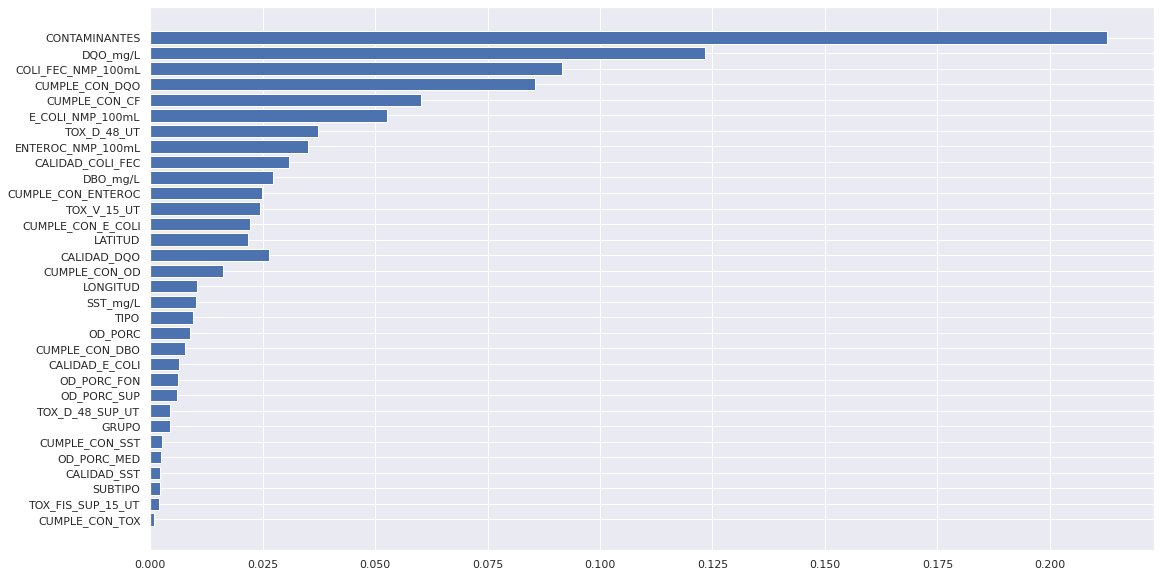

In [ ]:
sns.set(rc={'figure.figsize':(18,10)})
sorted_idx = pipe_modelo['modelo'].feature_importances_.argsort()
plt.barh(features,pipe_modelo['modelo'].feature_importances_[sorted_idx])

## Realizamos el algoritmo con las caracteristicas más importantes

In [ ]:
def validacion_scores(X,y):
  resultados = list()
  modelos = [RandomForestClassifier(random_state= 0), DecisionTreeClassifier(random_state= 0)]
  nombres = ['RandomForest', 'DecisionTree']
  for nombre,modelo in zip(nombres,modelos):
    KFold = RepeatedKFold(n_splits=8, n_repeats=3, random_state=0)
    score = cross_validate(estimator=modelo, X=transformada.fit_transform(X), y=y, cv=KFold)
    resultados.append({'nombre':nombre,'score':score['test_score'].mean()})
  return resultados

In [ ]:
validacion_scores(X_train,y_train)

[{'nombre': 'RandomForest', 'score': 0.9980675624342972},
 {'nombre': 'DecisionTree', 'score': 0.9974229564748804}]

In [ ]:
from graphviz import Source

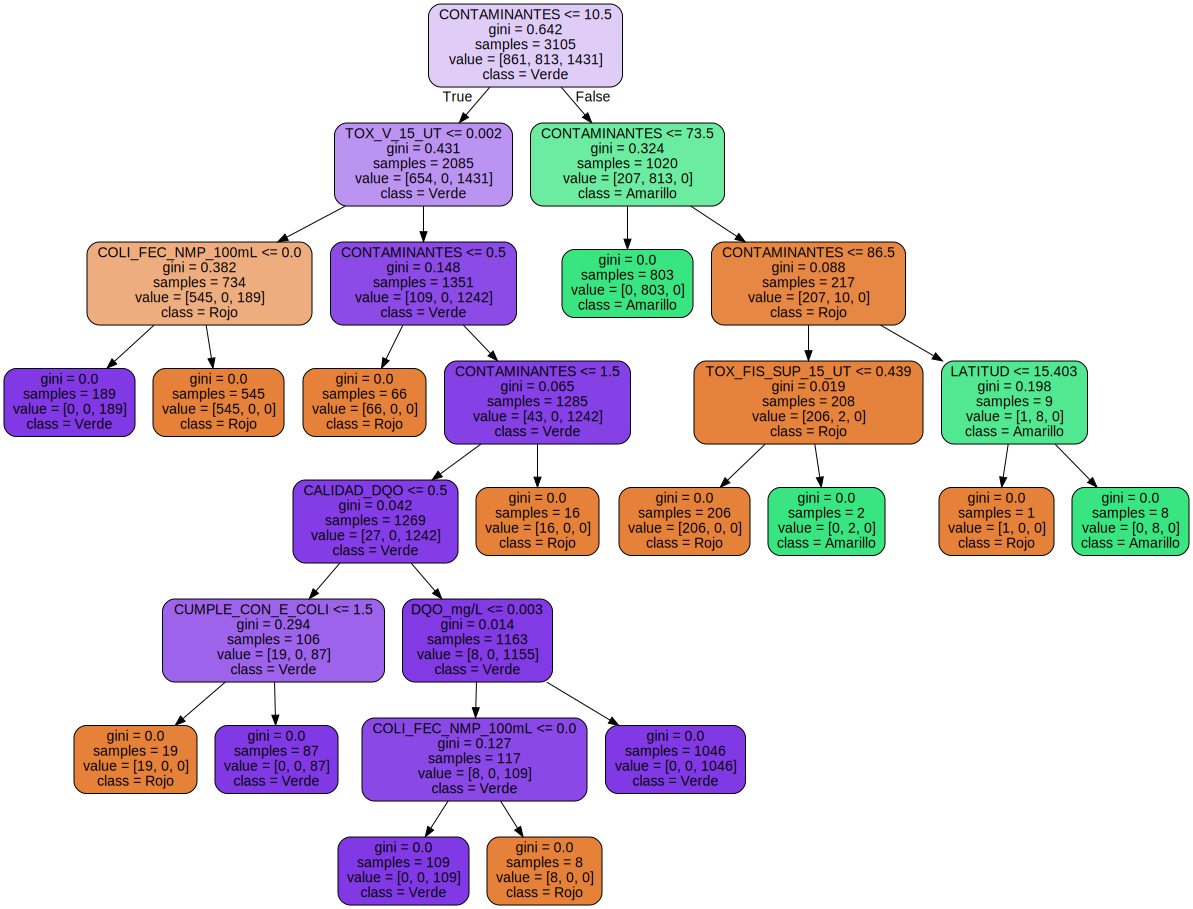

In [ ]:
model = DecisionTreeClassifier(random_state= 0)
model.fit(transformada.fit_transform(X_train), y_train)
Source(export_graphviz(
        model,
        feature_names= columns,
        class_names= ['Rojo', 'Amarillo', 'Verde'],
        rounded=True,
        filled=True
    ))


